# **networkx**

Networkx -  это библиотека на Python, которая позволяет создавать, исследовать и работать с графами и другими сетевыми структурами.

# **Введение**
**Зачем нужны эти библиотеки?**


  **networkx**: Анализ и визуализация графов:
Графы — это математические структуры, которые моделируют отношения между объектами. Библиотека networkx на Python позволяет эффективно работать с такими структурами. То есть она применяется для создания и анализа графов, таких как сети, маршруты, социальные графы и т.д.

 Основные возможности:


## Типы графов

  networkx поддерживает несколько типов графов:

  *  Graph – реализация простого неориентированного графа, где между двумя вершинами допускается только одно ребро, но возможны петли (связь вершины с самой собой).
  *  DiGraph — ориентированный граф, поддерживающий дополнительные функции и ограничения, характерные для направленных графов.
  *  MultiGraph —  мультиграф, в котором между двумя вершинами может существовать несколько ненаправленных рёбер.
  *  MultiDiGraph — соответственно ориентированный мультиграф.

In [3]:
import networkx as nx #как подключать библиотеку

In [2]:
G=nx.Graph() #неориентированный граф
G=nx.DiGraph() #ориентированный граф
G=nx.MultiGraph() #неориентированный мультиграф
G=nx.MultiDiGraph() #ориентированный мультиграф

## Создание графов

  Можно создать граф через последовательное добавление узлов и дуг (об этом в следующем пункте подробнее)

In [3]:
G = nx.Graph()
G.add_node("A")
G.add_edge("A", "B", weight=5)


  Также граф можно создать так: загрузка данных и формирование графа на основе файла или потока данных одного из поддерживаемых форматов: Матрица смежности,
  Матрица инцидентности, GEXF, GML, Pickle, GraphML, LEDA, YAML, SparseGraph6, Pajek, GIS Shapefile

In [4]:
G = nx.read_gml("example.gml")

FileNotFoundError: [Errno 2] No such file or directory: 'example.gml'

И третий вариант создания графов: через генератор графов, который предоставляет предустановленные классы для создания графов с распространёнными топологиями, включая полные графы различных порядков, сбалансированные деревья, циклические графы, графы Дороговцева — Гольтцева — Мендеса, случайные биномиальные графы и множество других типов.

In [5]:
G = nx.cycle_graph(5)

##   Добавление узлов и рёбер:


### Надо сказать, что узлами графа может быть что угодно: числа, строки, кортежи, изображение, другой граф и т.д.

In [8]:
G.add_node("A")  # добавить узел "A"
G.add_nodes_from(["B", "C", "D"])  # добавить узлы "B", "C" и "D"
G.add_node("E", role="manager", age=40)  # yзел с атрибутами

H = nx.path_graph(10)
G.add_nodes_from(H) # G теперь содержит узлы H как узлы G
G.add_node(H) # тут граф H как узел графа G

print(G.nodes)  # NodeView(('A', 'B', 'C', 'D', 'E'))
print(G.nodes["E"]["role"])  # manager
G.nodes["E"]["age"] = 41  # Изменить возраст
G.remove_node("D")  # Удалить узел "D"

['A', 'B', 'C', 'D', 'E']


### Ребра:

In [45]:
G.add_edge("A", "B")  # Ребро между "A" и "B"
G.add_edges_from([("B", "C"), ("C", "E")])  # Добавить рёбра
G.add_edge("A", "E", weight=3.5, label="connection")

print(G.edges)  # EdgeView([('A', 'B'), ('A', 'E'), ('B', 'C'), ('C', 'E')])
print(G.edges["A", "E"]["weight"])  # 3.5
G.edges["A", "E"]["weight"] = 4.0 #изменяем данные ребра
G.remove_edge("B", "C") # удаление ребра

[(0, 1), (1, 2), (1, 3), (2, 3), (2, 5), (2, 7), (2, 8), (2, 9), (3, 4), (3, 5), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 9), (5, 6), (6, 7), (7, 9), ('A', 'B'), ('A', 'E'), ('B', 'C'), ('C', 'E')]
3.5


### Пример работы с ребрами и вершинами. Анализ дружбы

In [4]:
G = nx.Graph()

G.add_node("Alice", age=25, job="developer")
G.add_node("Bob", age=30, job="designer")
G.add_node("Charlie", age=35, job="manager")

G.add_edge("Alice", "Bob", friendship_years=5)
G.add_edge("Alice", "Charlie", friendship_years=2)
G.add_edge("Bob", "Charlie", friendship_years=8)

friends = list(G.neighbors("Alice"))
print(f"Друзья Alice: {friends}")

print(f"Дружба Alice и Bob длится {G.edges['Alice', 'Bob']['friendship_years']} лет.")

Друзья Alice: ['Bob', 'Charlie']
Дружба Alice и Bob длится 5 лет.


Для работы с графами большой размерности лучше использовать итераторы

In [ ]:
# Генерация всех узлов без их хранения в памяти
for node in G.nodes:
    print(node)

# Генерация рёбер
for u, v in G.edges:
    print(f"Ребро между {u} и {v}")

## Анализ графа
Для анализа структуры графа в NetworkX доступны удобные инструменты для работы с узлами, рёбрами и их характеристиками. Четыре основных свойства графа предоставляют доступ к ключевым элементам графа:

* G.nodes: Узлы графа и их атрибуты.
* G.edges: Рёбра графа и их атрибуты.
* G.adj: Соседние узлы для каждого узла.
* G.degree: Количество рёбер, инцидентных узлу (степень узла).

Эти свойства работают как представления (views), которые автоматически обновляются при изменении графа. Кроме того, они напоминают словари, позволяя обращаться к данным узлов и рёбер.

In [ ]:
import networkx as nx

G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(3, "spam")

print(list(G.nodes))  # [1, 2, 3, 'spam']
print(list(G.edges))  # [(1, 2), (1, 3), (3, 'spam')]
print(list(G.adj[1]))  # [2, 3]
print(list(G.neighbors(1)))  # [2, 3]
print(G.degree[1])  # 2 (узел 1 соединён с 2 другими узлами)
print(list(G.edges([2, "spam"])))  # [(2, 1), ('spam', 3)]
print(G.degree([2, 3]))  # DegreeView({2: 1, 3: 2})

In [5]:
# Узлы можно рассматривать как словарь
G.add_node(1, role="manager", age=40)
print(G.nodes[1])  # {'role': 'manager', 'age': 40}
print(G.nodes[1]["role"])  # manager

# Для каждого ребра можно задавать и изменять атрибуты

G.add_edge(1, 3, weight=2.5, label="connection")
print(G.edges[1, 3])  # {'weight': 2.5, 'label': 'connection'}
print(G.edges[1, 3]["weight"])  # 2.5

# Изменение атрибута
G.edges[1, 3]["weight"] = 3.0


{'role': 'manager', 'age': 40}
manager
{'weight': 2.5, 'label': 'connection'}
2.5


Граф можно представлять через другие типы данных:

In [ ]:
# список
print(list(G.nodes))  # [1, 2, 3, 'spam']
print(list(G.edges))  # [(1, 2), (1, 3), (3, 'spam')]

# множество
print(set(G.edges))  # {('spam', 3), (1, 2), (1, 3)}

# словарь
print(dict(G.degree))  # {1: 2, 2: 1, 3: 2, 'spam': 1}

## Алгоритмы для анализа графов

 networkx включает множество алгоритмов для анализа графов. Рассмотрим ключевые из них:

In [ ]:
# алгоритм Дейкстры
path = nx.shortest_path(G, source="A", target="B", weight="weight")
print(path)  # ['A', 'B']

# Центральность узлов
centrality = nx.degree_centrality(G)
print(centrality)

# Обнаружение групп связанных узлов:
components = list(nx.connected_components(G))
print(components)

## Давайте подробнее про генераторы

Библиотека NetworkX помогает легко создавать и изменять графы. С ее помощью можно быстро строить графы и проводить с ними разные операции.

### Операции над графами:

In [6]:
sub = nx.subgraph(G, [1, 2, 3]) # создает подграф на основе указанных узлов

G_union = nx.union(G1, G2) # объединяет два графа, сохраняя их узлы и рёбра

G_product = nx.cartesian_product(G1, G2) # возвращает декартово произведение двух графов

G_complement = nx.complement(G) # возвращает дополнение графа (узлы соединяются, если ранее они не были связаны).

G_undirected = nx.to_undirected(G) # создает неориентированный вид графа

G_directed = nx.to_directed(G) # создает ориентированный вид графа


### Классические малые графы:

In [ ]:
petersen = nx.petersen_graph() # Граф Петерсона
tutte = nx.tutte_graph() # Граф Тутте
tetrahedral = nx.tetrahedral_graph() # тетраэдрический граф

### Использование (конструктивного) генератора для классического графа:

In [ ]:
K_5 = nx.complete_graph(5) # полный граф
K_3_5 = nx.complete_bipartite_graph(3, 5) # двудольный граф
barbell = nx.barbell_graph(10, 10) # граф-гиря, две полные части соединены дорожкой
lollipop = nx.lollipop_graph(10, 20) # граф-леденец, полный граф соединен с цепью

### Стохастические генераторы графов

(Эти генераторы создают случайные графы, используя заданные вероятности и параметры)

In [ ]:
er = nx.erdos_renyi_graph(100, 0.15) # случайный граф Эрдиша-Реньи, где p — вероятность наличия ребра между узлами.
ws = nx.watts_strogatz_graph(30, 3, 0.1) # граф Уоттса-Строгаца для моделирования сетей "мир тесен".
ba = nx.barabasi_albert_graph(100, 5) # граф Барабаши-Альберта
lobster = nx.random_lobster(100, 0.9, 0.9) # случайный граф-омар с заданными вероятностями

## Бэкенды

NetworkX позволяет ускорить работу с графами, если использовать бэкенды — это специальные дополнения, которые делают NetworkX мощнее. Они добавляют возможности, такие как работа на видеокартах (GPU), параллельные вычисления или интеграция с графовыми базами данных.

Зачем они нужны?

Представьте, что вы рисуете карту с дорогами. Если дорог много, вам понадобится больше времени, чтобы всё рассчитать. Бэкенды помогают ускорить процесс за счёт современных технологий:

* GPU (видеокарта) работает быстрее для больших графов.
* Многопоточность распределяет задачи между процессорами.
* Базы данных хранят огромные графы и позволяют быстро их обновлять.

Как использовать бэкенды?
Есть два способа:

1. Автоматическая настройка
Вы просто включаете нужный бэкенд, и NetworkX сам решает, как лучше использовать его.

2. Ручная настройка
Вы точно указываете, какой бэкенд использовать для каждой задачи.


In [ ]:
# Автоматическая настройка

# Создаём граф, например, социальную сеть
G = nx.erdos_renyi_graph(1000, 0.01)

# Указываем NetworkX использовать GPU-бэкенд
nx.config.backend_priority = ["gpu_backend"]

# Выполняем сложный расчёт, например, PageRank
pr = nx.pagerank(G)

print("PageRank рассчитан с использованием GPU.")

In [ ]:
# Ручная настройка

# Читаем граф из файла, используя базу данных
G = nx.read_gml("mygraph.gml", backend="database_backend")

# Считаем степень каждого узла
degree_dict = dict(G.degree)

print("Данные обработаны через базу данных.")

Как работают бэкенды?
Когда вы включаете бэкенд, NetworkX проверяет:

Есть ли поддержка нужной функции в бэкенде?
Если есть, выполняется оптимизированный код.

Если поддержки нет, что делать?
NetworkX возвращается к стандартным алгоритмам.

## Визуализация графов

Визуализация графов в этой библиотеке вторична, но реализована. Предоставлены удобные методы для отображения графов с использованием Python библиотеки Matplotlib или внешнего модуля Graphviz для боле сложных случаев.

### Основные методы визуализации
* nx.draw()

Это базовая функция для визуализации графов. Она автоматически размещает узлы и рисует рёбра.

* nx.draw_networkx()

Расширенная версия draw(), которая позволяет подписывать узлы и добавлять больше стилей.

* Другие варианты расположения узлов

nx.draw_circular() — узлы располагаются по кругу.

nx.draw_spectral() — узлы располагаются на основе спектральных свойств графа.

nx.draw_shell() — узлы группируются в "оболочки".

nx.draw_spring() — узлы имитируют пружины, стремясь к сбалансированному положению.

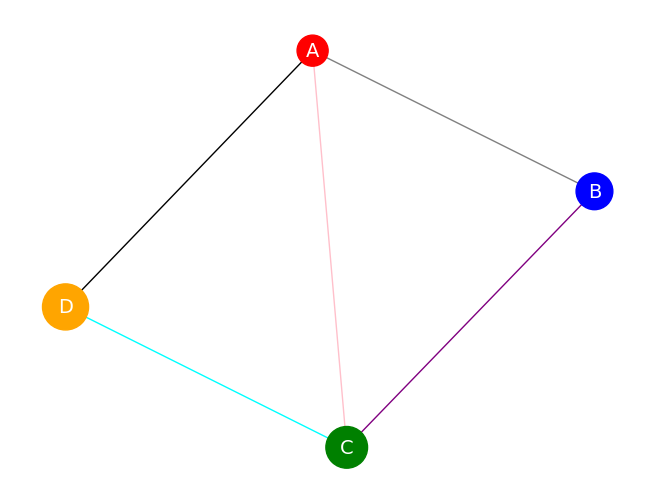

In [11]:

import matplotlib.pyplot as plt

# Создаём граф
G = nx.Graph()
G.add_edges_from([("A", "B"), ("B", "C"), ("C", "D"), ("D", "A"), ("A", "C")])

# Настройки узлов и рёбер
node_colors = ["red", "blue", "green", "orange"]
edge_colors = ["gray", "black", "pink", "purple", "cyan"]
node_sizes = [500, 700, 900, 1100]

# Рисуем граф с кастомизацией
nx.draw(
    G,
    with_labels=True,
    node_color=node_colors,
    edge_color=edge_colors,
    node_size=node_sizes,
    font_size=14,
    font_color="white",
)
plt.show()


А также networkx позволяет сохранять визуализации графов в файлы

Для сохранения рисунка графа используется функция plt.savefig().

In [ ]:
nx.draw(G, with_labels=True)
plt.savefig("graph.png")


Для экспорта графа в текстовый формат DOT используется write_dot.


In [ ]:
from networkx.drawing.nx_pydot import write_dot
write_dot(G, "graph.dot")

## Примеры:

### Транспортная сеть

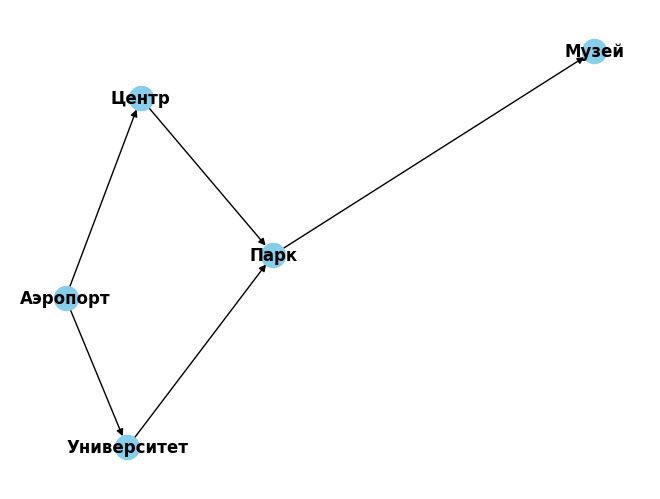

Кратчайший путь: ['Аэропорт', 'Центр', 'Парк', 'Музей']
Расстояние: 55 минут


In [24]:
# создаем граф
city_map = nx.DiGraph()
city_map.add_weighted_edges_from([
    ("Аэропорт", "Центр", 30),
    ("Центр", "Парк", 10),
    ("Аэропорт", "Университет", 40),
    ("Университет", "Парк", 20),
    ("Парк", "Музей", 15),
])

# визуализация
import matplotlib.pyplot as plt
nx.draw(city_map, with_labels=True, node_color='skyblue', font_weight='bold')
plt.show()

# поиск кратчайшего пути
source = "Аэропорт"
destination = "Музей"
path = nx.shortest_path(city_map, source=source, target=destination, weight="weight")
distance = nx.shortest_path_length(city_map, source=source, target=destination, weight="weight")

print(f"Кратчайший путь: {path}")
print(f"Расстояние: {distance} минут")


### Расчет кэшбека по графу

In [23]:
# строим граф операций
bank_operations = nx.DiGraph()
bank_operations.add_weighted_edges_from([
    ("Пополнение карты", "Покупка в магазине", 2),
    ("Покупка в магазине", "Кешбэк", 1),
    ("Пополнение карты", "Оплата онлайн", 3),
    ("Оплата онлайн", "Кешбэк", 1.5),
])

# находим путь с максимальным кешбэком
path = nx.dag_longest_path(bank_operations, weight="weight")
max_cashback = nx.dag_longest_path_length(bank_operations, weight="weight")

print(f"Оптимальная последовательность: {path}")
print(f"Максимальный кешбэк: {max_cashback}%")


Оптимальная последовательность: ['Пополнение карты', 'Оплата онлайн', 'Кешбэк']
Максимальный кешбэк: 4.5%


## Распространение инфекции

Шаг 1: заражено 2 человек
Шаг 2: заражено 3 человек
Шаг 3: заражено 4 человек
Шаг 4: заражено 5 человек
Шаг 5: заражено 8 человек
Шаг 6: заражено 9 человек
Шаг 7: заражено 9 человек
Шаг 8: заражено 10 человек
Шаг 9: заражено 10 человек
Шаг 10: заражено 10 человек


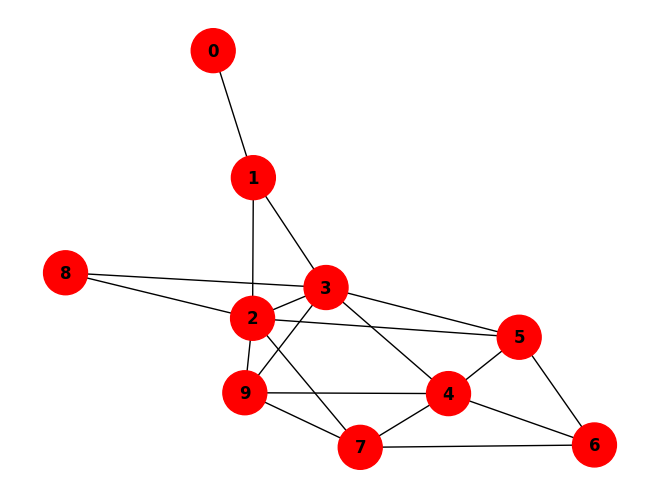

In [22]:
import random

# создаем граф
G = nx.erdos_renyi_graph(10, 0.3)

# инициализируем состояния
states = {node: 'S' for node in G.nodes}  # все здоровы
patient_zero = random.choice(list(G.nodes))  # случайный человек заражен
states[patient_zero] = 'I'  # этот человек заражен

# симуляция распространения инфекции
def spread_infection(G, states, infection_prob=0.3):
    new_states = states.copy()
    for node in G.nodes:
        if states[node] == 'I':  # если человек заражен
            for neighbor in G.neighbors(node):
                if states[neighbor] == 'S' and random.random() < infection_prob:
                    new_states[neighbor] = 'I'  # заражаем соседа
    return new_states

# степени заражения в течение 10 шагов
for step in range(10):
    states = spread_infection(G, states)
    infected = sum(1 for state in states.values() if state == 'I')
    print(f"Шаг {step+1}: заражено {infected} человек")

# визуализизируем граф
pos = nx.spring_layout(G)
node_colors = ['red' if states[node] == 'I' else 'green' for node in G.nodes]
nx.draw(G, pos, with_labels=True, node_color=node_colors, font_weight='bold', node_size=1000)
plt.show()


# Graphlib

## Что такое Graphlib?

Graphlib — библиотека для выполнения топологической сортировки — линейного упорядочивания вершин графа, при котором для каждого ребра (u -> v) вершина u предшествует вершине v. Используется в задачах планирования (например, порядок выполнения задач). Полное топологическое упорядочение возможно лишь в том случае, если граф является направленным ациклическим графом, то есть если в нем отсутствуют направленные циклы.

Шаги, необходимые для выполнения сортировки заданного графа:


1.   Создать экземпляр TopologicalSorter с необязательным начальными графом.
2.   Добавить дополнительные узлы в граф.
3.   Вызвать метод prepare() для графа
4.   Пока is_active() возвращает True, перебирать узлы, возвращаемые методом get_ready(), и обрабатывать их. После завершения обработки вызвать метод done() для каждого узла.

Но, если нужно просто отсортировать узлы в графе прямо сейчас и не важно, чтобы это происходило одновременно, вы можете сразу использовать метод TopologicalSorter.static_order().

Пример:

In [25]:
from graphlib import TopologicalSorter #импортируем

# создаем граф зависимостей в курсе обучения
learning_path = {
    "Сдача экзамена": {"Повторение материала"},
    "Повторение материала": {"Изучение лекций", "Решение практических заданий"},
    "Решение практических заданий": {"Изучение лекций"},
    "Изучение лекций": set()
}

# выполняем топологическую сортировку
sorter = TopologicalSorter(learning_path)
order = tuple(sorter.static_order())
print("Порядок изучения материала:", order)

Порядок изучения материала: ('Изучение лекций', 'Решение практических заданий', 'Повторение материала', 'Сдача экзамена')


## Особенности

### Хэшируемость узлов и зависимостей
Все узлы и предшественники в графе должны быть хэшируемыми (строки, числа, кортежи). Это нужно для того, чтобы библиотека могла правильно добавлять элементы и эффективно с ними работать. Если попробовать использовать объекты, которые нельзя захэшировать, такие как списки или словари, то это приведет к ошибке.

### Добавление узлов и предшественников

In [26]:
sorter = TopologicalSorter()
sorter.add("B", "A")  # B зависит от A
sorter.add("C", "A")  # C зависит от A
sorter.add("D", "B", "C")  # D зависит от B и C

# вычисляем порядок выполнения
order = tuple(sorter.static_order())
print("Порядок выполнения задач:", order)


Порядок выполнения задач: ('A', 'B', 'C', 'D')


### Подготовка графов
Метод prepare() выполняет финальную проверку графа, включая поиск циклов. Если цикл обнаружен, выбрасывается CycleError

In [ ]:
from graphlib import CycleError

try:
    sorter.prepare()
except CycleError as e:
    print("Обнаружен цикл:", e.args[1])

### Итеративная обработка

Код позволяет выполнять задачи в порядке их готовности. Задачи добавляются в очередь, и обработка продолжается до тех пор, пока все задачи не будут завершены.

In [ ]:
sorter.prepare()
while sorter.is_active():
    for task in sorter.get_ready():
        print(f"Обрабатывается задача: {task}")
        sorter.done(task)

Метод is_active() возвращает true, если обработка графа может продолжаться, а это значит, что существуют узлы, готовые к обработке (их можно получить с помощью get_ready()) или общее кол-во узлов, помеченные как завершенные (через done())), меньше числа узлов, которые были возвращены вызовом get_ready()

Eсли граф полностью обработан или его дальше невозможно обработать, например, из-за циклов то метод вернет False

Метод get_ready() возвращает кордеж узлов, которые готовы к выполнению. Узел считается готовым, если все его предшественники уже были помечены как готовые через done() или у него нет предшественников.

### Статический порядок

Метод static_order() позволяет обойти (перебрать) узлы графа в порядке топологической сортировки, то есть так, чтобы каждая зависимость появлялась раньше тех узлов, которые от неё зависят. Этот метод возвращает специальный объект — итератор, который можно использовать в цикле или преобразовать в список.

Вот так можно представить его в виде кода. то есть вы можете просто использовать метод, а всё остальное метод сделает за вас.

In [28]:
def static_order(self):
    self.prepare()  # Подготавливаем граф
    while self.is_active():  # Пока есть узлы для обработки
        node_group = self.get_ready()  # Получаем доступные узлы
        yield from node_group  # Возвращаем узлы по одному
        self.done(*node_group)  # Отмечаем, что эти узлы обработаны

Если в графе есть несколько узлов на одном уровне (например, они не зависят друг от друга), то порядок их возврата зависит от того, в каком порядке они были добавлены в граф. Посмотрим на два примера:

In [32]:
from graphlib import TopologicalSorter

# Пример 1
ts = TopologicalSorter()
ts.add(3, 2, 1)  # Узел 3 зависит от 2 и 1
ts.add(1, 0)  # Узел 1 зависит от 0
print([*ts.static_order()])  # Печатаем порядок обхода графа
# Результат: [2, 0, 1, 3]

# Пример 2
ts2 = TopologicalSorter()
ts2.add(1, 0)  # Узел 1 зависит от 0
ts2.add(3, 2, 1)  # Узел 3 зависит от 2 и 1
print([*ts2.static_order()])
# Результат: [0, 2, 1, 3]


[2, 0, 1, 3]
[0, 2, 1, 3]


## Исключения в Graphlib

1.   ValueError — это исключение, которое возникает в Python, когда функция получает аргумент правильного типа, но значение этого аргумента не подходит для выполнения операции.
В библиотеке Graphlib ValueError может возникнуть, если мы пытаемс добавить узлы или зависимости, которые не соответствуют ожиданиям для корректной работы графа. Например, если мы добавили зависимости от несуществующих узлов.
2.   CycleError — это подкласс ValueError, который возникает в библиотеке Graphlib, когда граф содержит цикл. Цикл — это ситуация, когда узлы графа взаимно зависят друг от друга, что делает невозможным упорядочение их без нарушения зависимостей.



## Примеры

### Планировщик задач

In [33]:
tasks = {
    "Сборка ПК": {"Установка процессора", "Установка оперативной памяти"},
    "Установка процессора": {"Подготовка корпуса"},
    "Установка оперативной памяти": {"Подготовка корпуса"}
}
sorter = TopologicalSorter(tasks)
print("Порядок выполнения:", tuple(sorter.static_order()))

Порядок выполнения: ('Подготовка корпуса', 'Установка процессора', 'Установка оперативной памяти', 'Сборка ПК')


### Рекомендательная система для крусов обучения

In [35]:
from graphlib import TopologicalSorter

courses = {
    "Машинное обучение": {"Математический анализ", "Программирование на Python 2"},
    "Математический анализ": {"Основы алгебры"},
    "Программирование на Python 2": {"Программирование на Python 1"},
    "Программирование на Python 1": set(),
    "Основы алгебры": set(),
}

sorter = TopologicalSorter(courses)
learning_path = list(sorter.static_order())
print("Рекомендуемый порядок изучения курсов:", learning_path)


Рекомендуемый порядок изучения курсов: ['Основы алгебры', 'Программирование на Python 1', 'Математический анализ', 'Программирование на Python 2', 'Машинное обучение']


### Сценарий квеста

In [39]:
quest_stages = {
    "Войти в замок": {"Найти секретный ключ"},
    "Найти секретный ключ": {"Исследовать подземелье"},
    "Исследовать подземелье": {"Победить призраков", "Открыть проход к трону"},
    "Победить призраков": {"Найти магический артефакт"},
    "Открыть проход к трону": {"Активировать тайный механизм"},
    "Активировать тайный механизм": {"Найти магический артефакт"},
    "Найти магический артефакт": set(),
    "Добраться до сокровищницы": {"Войти в замок", "Открыть проход к трону"},
    "Собрать целебные зелья": {"Исследовать подземелье"},
    "Найти карту лабиринта": {"Найти секретный ключ"},
    "Завершить квест": {"Добраться до сокровищницы", "Собрать целебные зелья", "Найти карту лабиринта"},
}

sorter = TopologicalSorter(quest_stages)
quest_order = list(sorter.static_order())

print("Ваш сценарий квеста:")
for step in quest_order:
    print(f"- {step}")


Ваш сценарий квеста:
- Найти магический артефакт
- Победить призраков
- Активировать тайный механизм
- Открыть проход к трону
- Исследовать подземелье
- Найти секретный ключ
- Собрать целебные зелья
- Войти в замок
- Найти карту лабиринта
- Добраться до сокровищницы
- Завершить квест


### Подготовка к коллоку по матану

In [44]:
from graphlib import TopologicalSorter

# Темы и действия
prep_process = {
    "Выпить кофе": set(),
    "Основы анализа": {"Выпить кофе"},
    "Пределы функций": {"Основы анализа"},
    "Производные": {"Основы анализа"},
    "Поплакать над задачей": {"Пределы функций", "Производные"},
    "Посмотреть объяснение индуса на YouTube": {"Поплакать над задачей"},
    "Снова попробовать решить задачу": {"Посмотреть объяснение индуса на YouTube"},
    "Пределы последовательностей": {"Основы анализа"},
    "Сходимость": {"Пределы последовательностей"},
    "Числовые ряды": {"Сходимость"},
    "Интегралы Римана": {"Производные", "Числовые ряды"},
    "Выдохнуть и пойти спать": {"Интегралы Римана", "Снова попробовать решить задачу"},
}

# создаем топологический сортировщик
sorter = TopologicalSorter(prep_process)

# Генерим порядок подготовки
study_order = list(sorter.static_order())

# выводим порядок подготовки
print("Реалистичный порядок подготовки к коллоквиуму:")
for i, step in enumerate(study_order, 1):
    print(f"{i}. {step}")


Реалистичный порядок подготовки к коллоквиуму:
1. Выпить кофе
2. Основы анализа
3. Пределы функций
4. Производные
5. Пределы последовательностей
6. Поплакать над задачей
7. Сходимость
8. Посмотреть объяснение индуса на YouTube
9. Числовые ряды
10. Снова попробовать решить задачу
11. Интегралы Римана
12. Выдохнуть и пойти спать
